## Exploratory Data Analysis
In this notebook the distributions of the data are explored, and attributes are normalised if required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustertend import hopkins

import math

%matplotlib inline
pd.set_option('precision', 2)
sns.set()

column_list = ['mpl_hostname','mpl_letter','mst_metratio','mpl_discmethod','mpl_pnum','mpl_orbper','mpl_orbsmax',
               'mpl_orbeccen','mpl_orbincl','mpl_bmassj','mpl_radj','mpl_dens','mpl_eqt','mpl_insol',
               'mst_teff','mst_mass','mst_rad','mst_age','mst_lum','mpl_status']

core_columns = ['mst_teff','mst_mass','mst_rad','mpl_orbper','mpl_orbsmax',
                                      'mpl_massj','mpl_radj','mpl_dens','mpl_eqt']

Read the file containing the last data to be extracted from the archive.

In [2]:
exoplanet_extract = pd.read_pickle('current_exo_ext')

The planets density is a column that is critical in determining the type of planet. So only rows that have a density estimate are used, any rows with NA is discarded. A smaller number of attributes were maintained as the rest were not suitable, or provided no more information.

In [3]:
exoplanet_core = exoplanet_extract.loc[exoplanet_extract['mpl_dens'].notnull(),core_columns]
print(f"Number of candidate planets with values for planet density {len(exoplanet_core)}")

Number of candidate planets with values for planet density 530


We start by examining the five-number statistics of the data.


In [4]:
exoplanet_core.describe()

,mst_teff,mst_mass,mst_rad,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt
count,504.00,524.00,523.00,530.00,4.64e+02,5.24e+02,523.00,530.00,383.00
mean,5544.59,1.02,1.17,17.23,9.31e-02,1.13e+00,0.89,2.58,1326.03
std,889.58,0.29,0.56,58.08,1.57e-01,2.32e+00,0.52,5.04,535.98
min,2559.00,0.08,0.04,0.09,4.40e-03,2.10e-04,0.05,0.03,199.00
25%,5177.75,0.89,0.86,2.80,3.71e-02,3.77e-02,0.31,0.43,977.00
50%,5663.00,1.03,1.07,4.13,4.85e-02,5.22e-01,1.02,1.03,1377.00
75%,6021.00,1.19,1.44,9.61,7.13e-02,1.22e+00,1.28,2.83,1650.00
max,10170.00,2.52,6.30,1047.84,2.03e+00,2.72e+01,2.08,77.70,4050.00


The orbital period (mpl_orbper), planet mass(mpl_massj) and planet density (mpl_dens) values all have significant differences between their mean and median (50% percentile) values. The number of rows that have a value for planet temperature (mpt_eqt) is almost have the number that have a density. It is considered to be another critical value for the the clustering. 
Next the skew is calculated.

In [5]:
exoplanet_core.skew()

mst_teff       -0.30
mst_mass       -0.13
mst_rad         2.69
mpl_orbper     11.84
mpl_orbsmax     6.24
mpl_massj       6.15
mpl_radj       -0.13
mpl_dens        8.00
mpl_eqt         0.29
dtype: float64

As expected, the skew for the orbital period, orbital distance, mass and density are all large. The number of outliers may be another challenge. A boxplot of the star temperature and estimated planet temperature are plotted together as they have a similar range. 

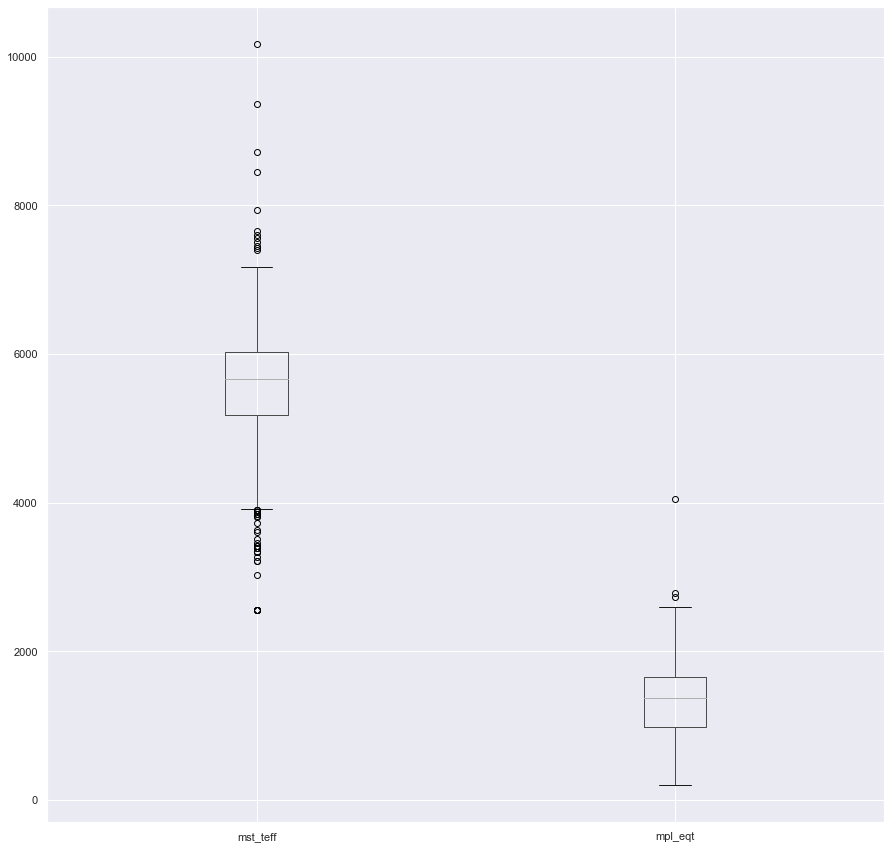

In [6]:
ax = exoplanet_core.boxplot(figsize=(15,15),column=['mst_teff','mpl_eqt'])

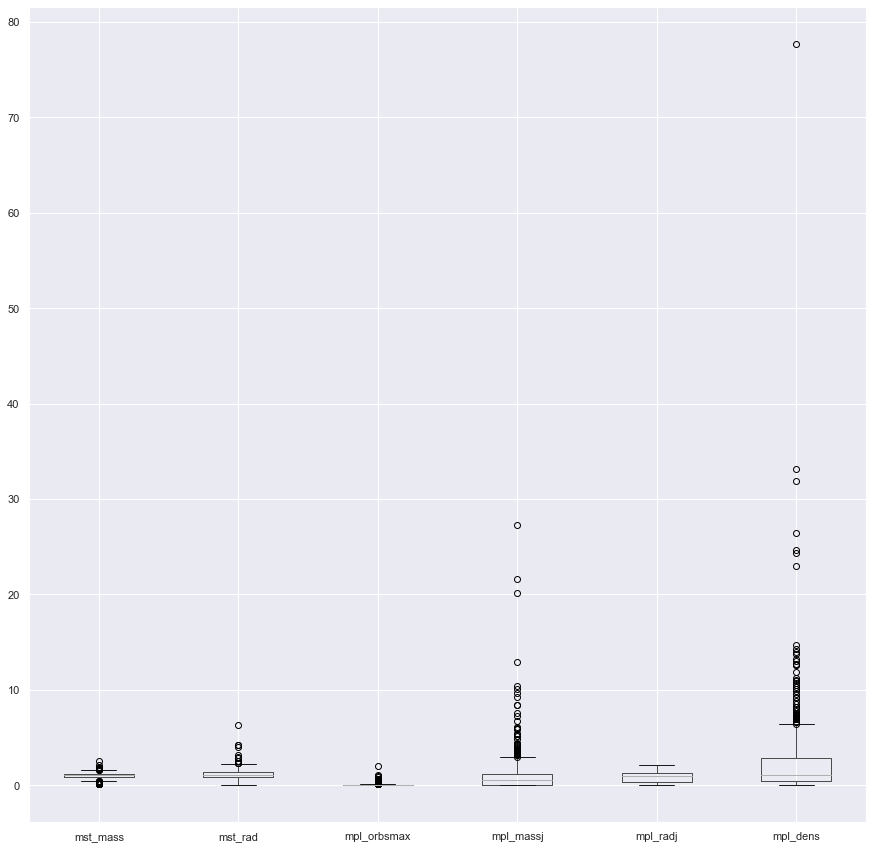

In [7]:
ax = exoplanet_core.boxplot(figsize=(15,15),column=['mst_mass','mst_rad','mpl_orbsmax','mpl_massj',
                'mpl_radj','mpl_dens'])

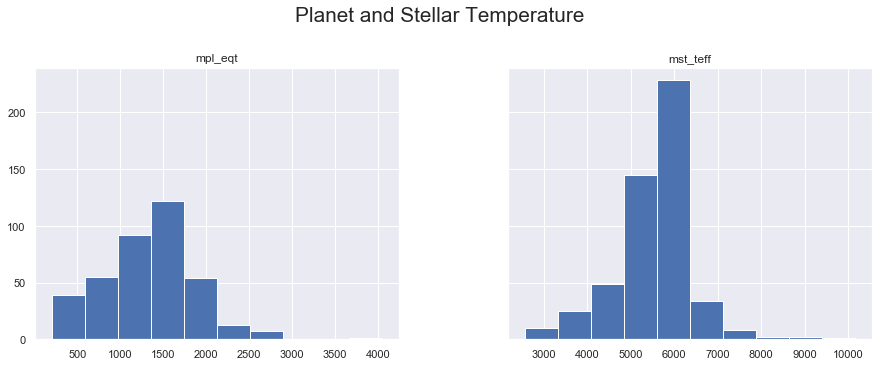

In [8]:
fig, axes = plt.subplots(figsize=(15,5),nrows=1, ncols=2, sharey=True)
exoplanet_core.hist(column=['mst_teff','mpl_eqt'], ax=axes)
blag = plt.suptitle('Planet and Stellar Temperature', x=0.5, y=1.05, ha='center', fontsize='xx-large')


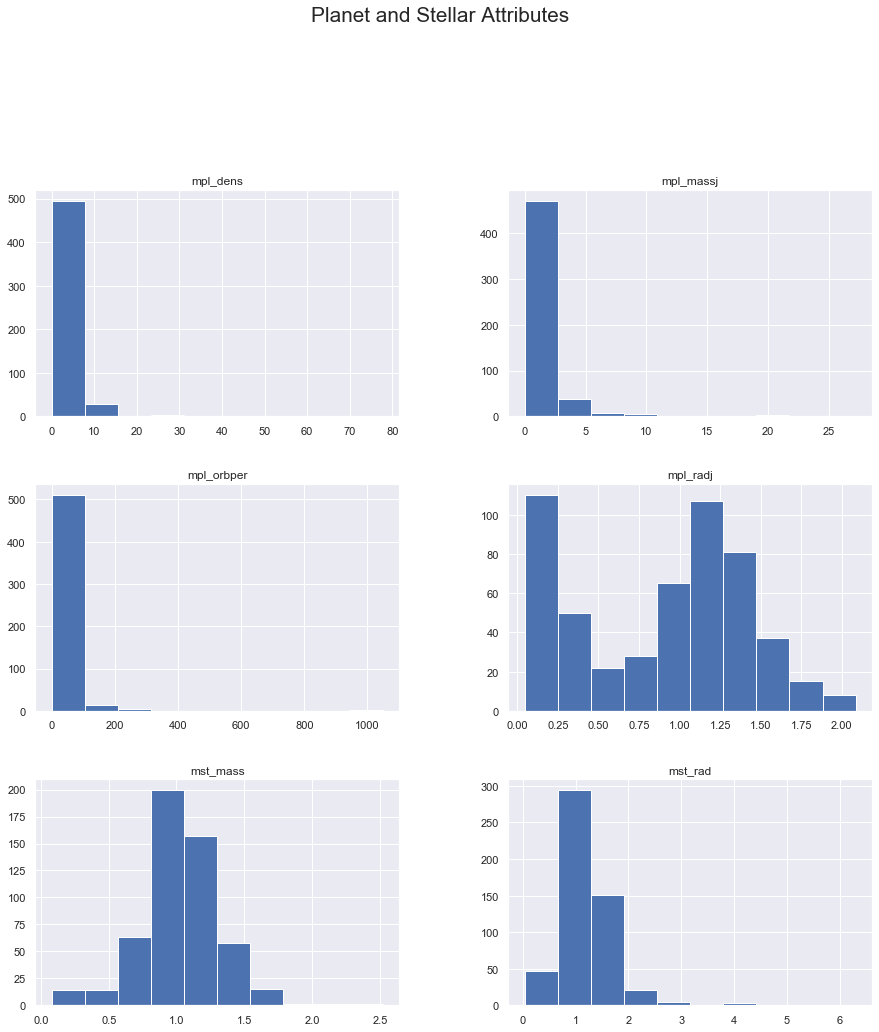

In [9]:
fig, axes = plt.subplots(figsize=(15,15),nrows=3, ncols=2)
exoplanet_core.hist(column=['mst_mass','mst_rad','mpl_orbper','mpl_massj',
                'mpl_radj','mpl_dens'], ax=axes)
blah = plt.suptitle('Planet and Stellar Attributes', x=0.5, y=1.05, ha='center', fontsize='xx-large')


In [10]:
exoplanet_core.corr()

,mst_teff,mst_mass,mst_rad,mpl_orbper,mpl_orbsmax,mpl_massj,mpl_radj,mpl_dens,mpl_eqt
mst_teff,1.00e+00,0.93,5.70e-01,-1.90e-03,2.32e-02,0.29,0.54,-1.31e-01,0.71
mst_mass,9.27e-01,1.00,7.48e-01,-3.55e-02,-1.92e-02,0.30,0.58,-1.12e-01,0.73
mst_rad,5.70e-01,0.75,1.00e+00,-2.31e-02,5.72e-03,0.18,0.42,-1.25e-01,0.59
mpl_orbper,-1.90e-03,-0.04,-2.31e-02,1.00e+00,9.40e-01,-0.07,-0.13,-1.07e-02,-0.29
mpl_orbsmax,2.32e-02,-0.02,5.72e-03,9.40e-01,1.00e+00,-0.09,-0.21,-9.29e-03,-0.40
mpl_massj,2.90e-01,0.30,1.84e-01,-7.40e-02,-9.26e-02,1.00,0.32,2.58e-01,0.28
mpl_radj,5.44e-01,0.58,4.22e-01,-1.33e-01,-2.09e-01,0.32,1.00,-3.70e-01,0.68
mpl_dens,-1.31e-01,-0.11,-1.25e-01,-1.07e-02,-9.29e-03,0.26,-0.37,1.00e+00,-0.24
mpl_eqt,7.11e-01,0.73,5.91e-01,-2.90e-01,-4.02e-01,0.28,0.68,-2.44e-01,1.00


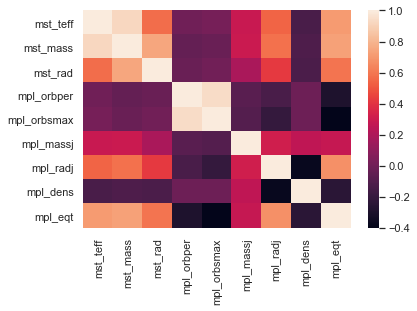

In [11]:
ax = sns.heatmap(exoplanet_core.corr())

The data have skews and values that present challenges to clustering algorithms. This include skew, distribution and large difference in scale. We take the natural logarithm of values to reduce the data back to linear relationships.

In [12]:
exoplanet_core['mst_teff_lg'] = np.log1p(1+exoplanet_core.mst_teff)
exoplanet_core['mst_mass_lg'] = np.log1p(1+exoplanet_core.mst_mass)
exoplanet_core['mst_rad_lg'] = np.log1p(1+exoplanet_core.mst_rad)
exoplanet_core['mpl_orbsmax_lg'] = np.log1p(1+exoplanet_core.mpl_orbsmax)
exoplanet_core['mpl_orbper_lg'] = np.log1p(1+exoplanet_core.mpl_orbper)
exoplanet_core['mpl_massj_lg'] = np.log1p(1+exoplanet_core.mpl_massj)
exoplanet_core['mpl_radj_lg'] = np.log1p(1+exoplanet_core.mpl_radj)
exoplanet_core['mpl_eqt_lg'] = np.log1p(1+exoplanet_core.mpl_eqt)
exoplanet_core['mpl_dens_lg'] = np.log1p(1+exoplanet_core.mpl_dens)


exoplanet_core = exoplanet_core.drop(core_columns,axis=1)

In [13]:
exoplanet_core.describe()


,mst_teff_lg,mst_mass_lg,mst_rad_lg,mpl_orbsmax_lg,mpl_orbper_lg,mpl_massj_lg,mpl_radj_lg,mpl_eqt_lg,mpl_dens_lg
count,504.00,524.00,523.00,464.00,530.00,524.00,523.00,383.00,530.00
mean,8.61,1.10,1.14,0.74,2.15,1.03,1.04,7.09,1.31
std,0.18,0.10,0.16,0.06,0.96,0.41,0.19,0.50,0.56
min,7.85,0.73,0.71,0.70,0.74,0.69,0.72,5.30,0.71
25%,8.55,1.06,1.05,0.71,1.57,0.71,0.84,6.89,0.89
50%,8.64,1.11,1.12,0.72,1.81,0.93,1.11,7.23,1.11
75%,8.70,1.16,1.24,0.73,2.45,1.17,1.19,7.41,1.58
max,9.23,1.51,2.12,1.39,6.96,3.38,1.41,8.31,4.38


In [14]:
exoplanet_core.skew()

mst_teff_lg      -1.48
mst_mass_lg      -0.76
mst_rad_lg        0.92
mpl_orbsmax_lg    4.85
mpl_orbper_lg     1.75
mpl_massj_lg      2.10
mpl_radj_lg      -0.33
mpl_eqt_lg       -1.24
mpl_dens_lg       1.58
dtype: float64

In [15]:
exoplanet_core.corr()

,mst_teff_lg,mst_mass_lg,mst_rad_lg,mpl_orbsmax_lg,mpl_orbper_lg,mpl_massj_lg,mpl_radj_lg,mpl_eqt_lg,mpl_dens_lg
mst_teff_lg,1.00,9.32e-01,6.93e-01,4.77e-02,-2.79e-02,0.36,0.53,0.69,-0.28
mst_mass_lg,0.93,1.00e+00,8.32e-01,-2.65e-03,-7.38e-02,0.39,0.57,0.71,-0.27
mst_rad_lg,0.69,8.32e-01,1.00e+00,1.72e-02,-3.66e-03,0.28,0.46,0.63,-0.26
mpl_orbsmax_lg,0.05,-2.65e-03,1.72e-02,1.00e+00,9.03e-01,-0.16,-0.22,-0.55,-0.01
mpl_orbper_lg,-0.03,-7.38e-02,-3.66e-03,9.03e-01,1.00e+00,-0.27,-0.35,-0.72,0.02
mpl_massj_lg,0.36,3.91e-01,2.83e-01,-1.64e-01,-2.73e-01,1.00,0.56,0.39,0.15
mpl_radj_lg,0.53,5.67e-01,4.61e-01,-2.16e-01,-3.54e-01,0.56,1.00,0.66,-0.59
mpl_eqt_lg,0.69,7.12e-01,6.28e-01,-5.53e-01,-7.24e-01,0.39,0.66,1.00,-0.34
mpl_dens_lg,-0.28,-2.66e-01,-2.63e-01,-1.23e-02,1.89e-02,0.15,-0.59,-0.34,1.00


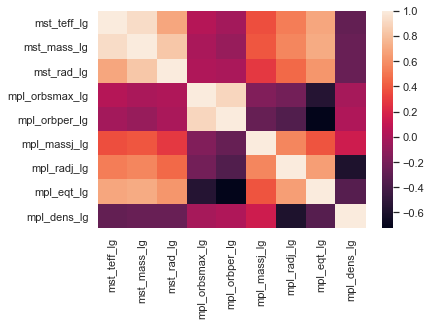

In [16]:
ax = sns.heatmap(exoplanet_core.corr())

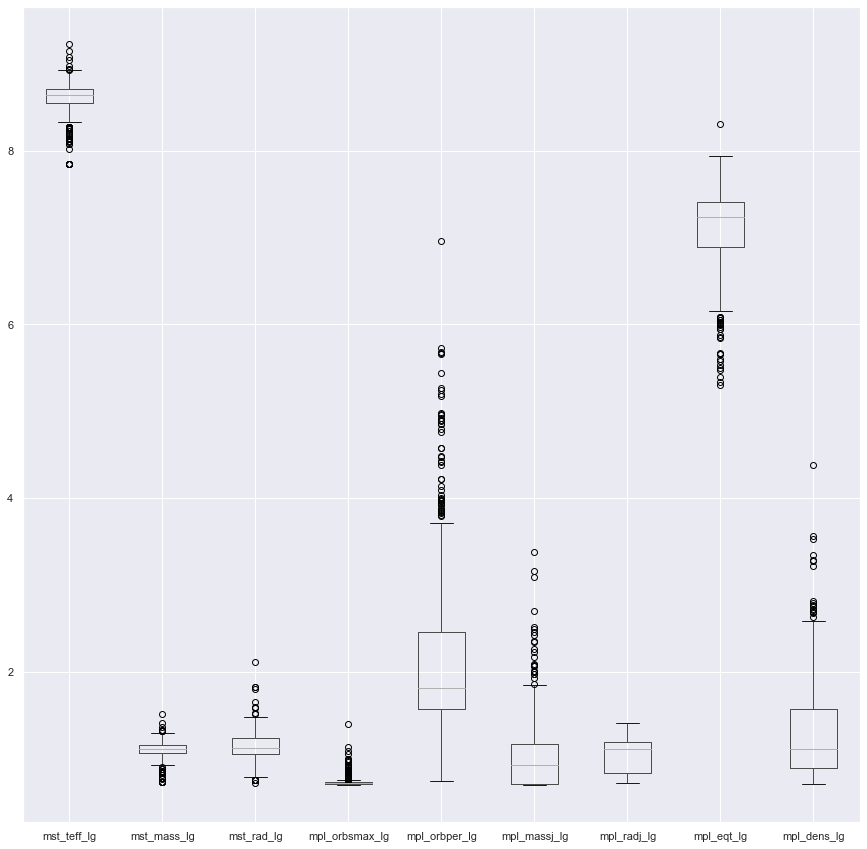

In [17]:
ax = exoplanet_core.boxplot(figsize=(15,15))


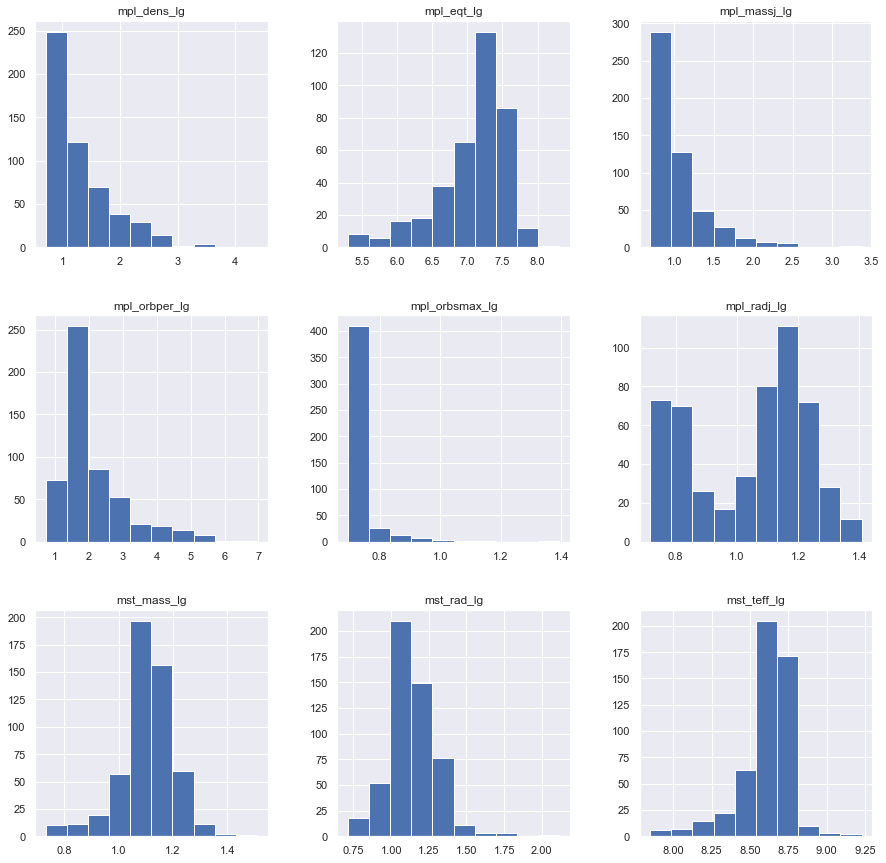

In [18]:
ax = exoplanet_core.hist(figsize=(15,15))

Try and see if a power transformer can assist with the skew.

In [19]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
exo_tran = pt.fit_transform(exoplanet_extract.loc[exoplanet_extract['mpl_dens'].notnull(),core_columns])
len(exo_tran)

530

In [20]:
exobc_df = pd.DataFrame(exo_tran, columns=core_columns, index=exoplanet_extract.loc[exoplanet_extract['mpl_dens'].notnull()].index)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 4160
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Star Temp. Eff.    372 non-null    float64
 1   Star Mass          372 non-null    float64
 2   Star Size          372 non-null    float64
 3   Planet Orb. Dist.  372 non-null    float64
 4   Planet Period      372 non-null    float64
 5   Planet Mass        372 non-null    float64
 6   Planet Size        372 non-null    float64
 7   Planet Temp. Est.  372 non-null    float64
 8   Planet Density     372 non-null    float64
dtypes: float64(9)
memory usage: 29.1 KB


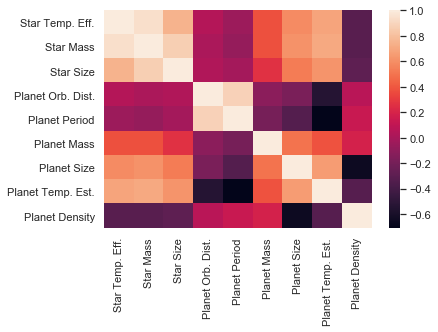

In [21]:
core_columns = ['mst_teff_lg','mst_mass_lg','mst_rad_lg','mpl_orbper_lg','mpl_orbsmax_lg','mpl_massj_lg',
                'mpl_radj_lg','mpl_dens_lg','mpl_eqt_lg']
# TODO Log in the column name
core_descriptive = ['Star Temp. Eff.', 'Star Mass','Star Size','Planet Period','Planet Orb. Dist.', 'Planet Mass',
                   'Planet Size','Planet Density','Planet Temp. Est.']

core_des_col = dict(zip(core_columns,core_descriptive))


all_values = exoplanet_core.dropna()
all_values = all_values.rename(columns=core_des_col)
all_values.info()
ax = sns.heatmap(all_values.corr())


In [22]:
# Save the curated data to a dataframe for clustering attempts
all_values.corr()

,Star Temp. Eff.,Star Mass,Star Size,Planet Orb. Dist.,Planet Period,Planet Mass,Planet Size,Planet Temp. Est.,Planet Density
Star Temp. Eff.,1.00,0.95,0.75,0.05,-0.04,0.38,0.59,0.69,-0.32
Star Mass,0.95,1.00,0.87,0.02,-0.07,0.38,0.61,0.71,-0.32
Star Size,0.75,0.87,1.00,0.04,-0.01,0.27,0.53,0.63,-0.29
Planet Orb. Dist.,0.05,0.02,0.04,1.00,0.88,-0.11,-0.18,-0.54,0.07
Planet Period,-0.04,-0.07,-0.01,0.88,1.00,-0.19,-0.33,-0.71,0.13
Planet Mass,0.38,0.38,0.27,-0.11,-0.19,1.00,0.50,0.38,0.19
Planet Size,0.59,0.61,0.53,-0.18,-0.33,0.50,1.00,0.65,-0.65
Planet Temp. Est.,0.69,0.71,0.63,-0.54,-0.71,0.38,0.65,1.00,-0.32
Planet Density,-0.32,-0.32,-0.29,0.07,0.13,0.19,-0.65,-0.32,1.00


In [23]:
all_values.describe()

,Star Temp. Eff.,Star Mass,Star Size,Planet Orb. Dist.,Planet Period,Planet Mass,Planet Size,Planet Temp. Est.,Planet Density
count,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00
mean,8.62,1.11,1.15,0.73,1.95,1.09,1.09,7.09,1.24
std,0.18,0.11,0.15,0.05,0.80,0.39,0.17,0.49,0.51
min,7.85,0.73,0.75,0.70,1.02,0.69,0.73,5.30,0.71
25%,8.57,1.06,1.05,0.71,1.55,0.78,1.03,6.91,0.87
50%,8.65,1.12,1.13,0.72,1.73,1.00,1.14,7.23,1.05
75%,8.72,1.17,1.25,0.73,2.02,1.21,1.21,7.41,1.46
max,9.23,1.51,2.12,1.39,6.96,3.10,1.41,8.31,3.56


In [24]:
all_values.skew()

Star Temp. Eff.     -1.60
Star Mass           -0.83
Star Size            0.59
Planet Orb. Dist.    7.01
Planet Period        2.58
Planet Mass          1.69
Planet Size         -0.80
Planet Temp. Est.   -1.25
Planet Density       1.55
dtype: float64

In [25]:
all_values.to_pickle('exoplanet_cluster_input')